# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
%load_ext autoreload
%autoreload 2

import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent_brandon import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('Pendulum-v0')
env.seed(2)
agent = Agent(state_size=3, action_size=1, random_seed=2)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
print('size of action space= {}\nsize of observation space={}'.format(env.action_space, 
                                                                      env.observation_space))

size of action space= Box(1,)
size of observation space=Box(3,)


### 3. Train the Agent with DDPG

In [4]:

model_version='test'
filename_actor='checkpoint_actor_{}.pth'.format(model_version)
filename_critic='checkpoint_critic_{}.pth'.format(model_version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 100	Average Score: -1282.75	Time: 0:00:01.708043
Episode 200	Average Score: -709.28	Time: 0:00:01.7240486
Total Time: 0:05:50.339518


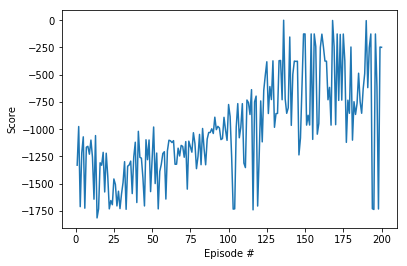

In [4]:
%load_ext autoreload
%autoreload 2

from datetime import datetime
from collections import deque


def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    total_time_start = datetime.now()

    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        
        episode_time_start = datetime.now()
        
        for t in range(max_t):
            action = agent.act(state)

            next_state, reward, done, _ = env.step(action)

            agent.step(state, action, reward, next_state, done)

            state = next_state
            
            score += reward

            if done:
                break

        scores_deque.append(score)
        scores.append(score)

        print('\rEpisode {}\tAverage Score: {:.2f}\tTime Elapsed: {}\r'.format(i_episode, 
                                                                     np.mean(scores_deque),
                                                                    datetime.now() - total_time_start), end="")
        torch.save(agent.actor_local.state_dict(), filename_actor)
        torch.save(agent.critic_local.state_dict(), filename_critic)
         
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tTime: {}'.format(i_episode, 
                                                                         np.mean(scores_deque),
                                                                        datetime.now() - episode_time_start))
            episode_time_start = datetime.now()
            
            
    print('Total Time: {}'.format(datetime.now() - total_time_start))
    
    return scores
    
scores = ddpg(n_episodes=200)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [5]:
!pip install JSAnimation

  Running setup.py bdist_wheel for JSAnimation ... done
  Stored in directory: /root/.cache/pip/wheels/3c/c2/b2/b444dffc3eed9c78139288d301c4009a42c0dd061d3b62cead
Successfully built JSAnimation
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# reference: 
# http://mckinziebrandon.me/TensorflowNotebooks/2016/12/21/openai.html
#
from matplotlib import animation
from IPython.display import display
from JSAnimation.IPython_display import display_animation

def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    
    # create matplotlib.animation
    # Note: gcf() is current figure
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    
    # pass matplotlib.animation to JSAnimation, then pass JSAnimation to IPython
    display(display_animation(anim, default_mode='loop'))
    

agent.actor_local.load_state_dict(torch.load(filename_actor))
agent.critic_local.load_state_dict(torch.load(filename_critic))

frames = []

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    
    frames.append(env.render(mode='rgb_array'))
    
    state, reward, done, _ = env.step(action)
    if done:
        break 


display_frames_as_gif(frames)
# env.close()

RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at torch/csrc/cuda/Module.cpp:51

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  